In [30]:
import os
import sys
import time

import jax.numpy as np
import matplotlib.pyplot as plt
from jax import random

nb_dir = os.path.split(os.path.split(os.getcwd())[0])[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from jaxsnn.dataset.yinyang import YinYangDataset



In [31]:
from jaxsnn.dataset.yinyang import YinYangDataset

key = random.PRNGKey(12)
dataset = YinYangDataset(key, size=1000)

In [70]:
# Test simple layer
from jaxsnn.functional.lif import LIFParameters, lif_init_weights, lif_init_state, lif_step
from jax.lax import scan

batch_size = 1
input_size = 1
hidden_size = 1
params = lif_init_weights(key, input_size, hidden_size, scale=0.5)

spikes = np.ones((10, batch_size))
state = lif_init_state((batch_size, hidden_size))

recording = {"v": [], "z": []}
for t in range(10):
    state, z = lif_step(state, *params, spikes[t])
    recording["z"].append(np.sum(np.squeeze(z)))
    recording["v"].append(np.squeeze(state.v))

print(recording["v"][0].shape)


()


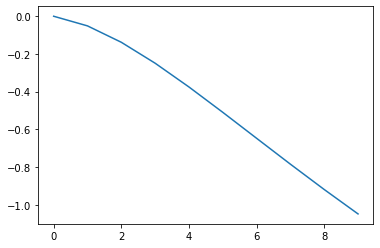

In [71]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(recording["v"])), recording["v"])